In [3]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import os

In [4]:
os.chdir('C:\\Users\\phwh9568\\geometaanalytics')

In [5]:
file = open('catMatches.json', encoding = 'utf-8')
data = json.load(file)

In [7]:
cats = data['data']

Convert json formatted data to csv:

In [ ]:
with open('catMatches_unique.csv', 'w', newline='', encoding='utf-8') as f:
    writer = csv.writer(f)
    writer.writerow(['Query Type','Queries', 'Matches', 'Unmatched', 'dc:description', 'dc:rights', 'geom_type', 'dct:provenance', 'dc:format', 'dc:publisher', 'dc:title', 'dc:subject', 'dc:creator', 'dct:spatial'])
    for item in cats:
        cat = item['cat']
        totalQ = item['totalQueries']
        matches = item['matches_count']
        no_matches = item['no_matches_count']
        desc = item['dc_description_count']
        rights = item['dc_rights_count']
        geom= item['layer_geom_type_count']
        prov = item['dct_provenance_count']
        form = item['dc_format_count']
        pub = item['dc_publisher_count']
        title = item['dc_title_count']
        subj = item['dc_subject_count']
        creator = item['dc_creator_count']
        spatial = item['dct_spatial_count']
        writer.writerow([cat, totalQ, matches, no_matches, desc, rights, geom, prov, form, pub, title, subj, creator, spatial])

Import new csv to pandas df:

In [9]:
unique = pd.read_csv('catMatches.csv', encoding='utf-8')

In [10]:
unique.sort_values('Queries', ascending=False, inplace=True)

Create new column representing match rates as a percentage:

In [11]:
unique['MatchPerc'] = (unique['Matches']/unique['Queries'])*100

Capitalize query types:

In [12]:
unique['Query Type'] = unique['Query Type'].str.capitalize()

Look at the dataframe:

In [14]:
unique

,Query Type,Queries,Matches,Unmatched,dc:description,dc:rights,geom_type,dct:provenance,dc:format,dc:publisher,dc:title,dc:subject,dc:creator,dct:spatial,MatchPerc
7,Topical,192,128,64,121,0,0,16,0,29,89,76,36,24,66.666667
5,Placename,188,147,41,147,0,1,78,0,66,129,59,67,117,78.191489
2,Locational,179,136,43,131,1,0,28,0,39,106,85,45,48,75.977654
0,Datatype,29,18,11,18,0,0,6,0,3,8,2,3,7,62.068966
6,Publication,27,26,1,26,0,0,14,1,23,22,21,22,14,96.296296
3,Organization,14,11,3,11,0,0,3,0,7,9,3,6,3,78.571429
8,Unknown,7,2,5,2,0,0,0,0,0,0,0,0,0,28.571429
1,Format,6,4,2,4,0,0,1,1,2,4,4,2,1,66.666667
4,Person,1,0,1,0,0,0,0,0,0,0,0,0,0,0.000000


Make a bar chart showing both total queries for each Query Type and match percentages:

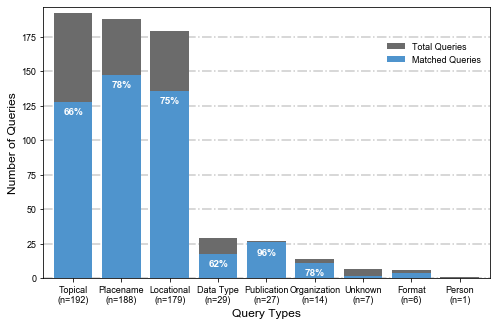

In [15]:
plt.rcParams["font.family"] = "Arial"


fig1 = plt.figure(figsize=(8,5))


# figure formatting
plt.grid(color='#CCCCCC', linestyle='-.', linewidth=1.5, axis='y', zorder=1)
plt.xticks(np.arange(9), ('Topical\n'+'(n={:,})'.format(unique.Queries[7]),
                                       'Placename\n'+'(n={:,})'.format(unique.Queries[5]),
                                       'Locational\n'+'(n={:,})'.format(unique.Queries[2]),
                                       'Data Type\n'+'(n={:,})'.format(unique.Queries[0]),
                                       'Publication\n'+'(n={:,})'.format(unique.Queries[6]),
                                       'Organization\n'+'(n={:,})'.format(unique.Queries[3]),
                                       'Unknown\n'+'(n={:,})'.format(unique.Queries[8]),
                                       'Format\n'+'(n={:,})'.format(unique.Queries[1]),
                                       'Person\n'+'(n={:,})'.format(unique.Queries[4])),fontsize=9)
plt.yticks(fontsize=9)
plt.margins(0.025)

# bars
bar1 = plt.bar(unique['Query Type'], unique.Queries, zorder=2, label='Total Queries', color='#6B6B6B')
bar2 = plt.bar(x = unique['Query Type'], height=unique.Matches, zorder=3, label = 'Matched Queries', color='#4F94CD')

# bar annotations
for b, p in zip(bar2, unique.MatchPerc):
    bh = b.get_height()
    perc = p
    plt.annotate('{}%'.format(int(perc)), xy=(b.get_x() + b.get_width()/2,bh-9), ha='center', fontsize=10, color='white',  fontweight='bold')

# axis labels and titles
#plt.title('Proportions of Total Queries Matched to Any Metadata Field', fontsize=14)
plt.ylabel('Number of Queries', fontsize=12)
plt.xlabel('Query Types', fontsize=12)

# legend
plt.legend(framealpha=0, prop={'size': 9}, bbox_to_anchor=(0.5, 0., 0.5, 0.9))

plt.show()

Export bar chart to image:

In [ ]:
fig1.savefig('C:\\Users\\phwh9568\\geometaanalytics\\fig1.png', dpi=300)